In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
input_size = 28 * 28
hidden_size = 100
num_classes = 10
epochs = 20
batch_size = 16

In [3]:
train_data = datasets.MNIST('./', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('./', train=False, download=True, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 503: Service Unavailable

9913344it [00:02, 3345237.42it/s]                             
Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable

29696it [00:00, 161265.08it/s]                           
Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable

1649664it [00:01, 1157597.98it/s]                             
Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable

5120it [00:00, 1520127.17it/s]          Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...
Done!

/Users/wg/Library/Python/3.8/lib/python/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you 

In [4]:
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [5]:
class MyModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MyModel, self).__init__()
        self.linear_layer = torch.nn.Linear(input_size, hidden_size)
        self.hidden_layer = torch.nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.linear_layer(x)
        out = torch.relu(out)
        out = self.hidden_layer(out)
        return out

In [6]:
model = MyModel(input_size, hidden_size, num_classes)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(epochs):
    for i, (X, y) in enumerate(train_loader):
        X = X.reshape(-1, input_size)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 1000 == 0:
            print(f'epoch: {epoch:2d}/{epochs}, step: {i + 1}/{len(train_loader)},loss={loss.item():.6f}')


epoch:  0/20, step: 1000/3750,loss=0.078009
epoch:  0/20, step: 2000/3750,loss=0.080598
epoch:  0/20, step: 3000/3750,loss=0.083764
epoch:  1/20, step: 1000/3750,loss=0.361043
epoch:  1/20, step: 2000/3750,loss=0.007788
epoch:  1/20, step: 3000/3750,loss=0.258215
epoch:  2/20, step: 1000/3750,loss=0.021340
epoch:  2/20, step: 2000/3750,loss=0.014035
epoch:  2/20, step: 3000/3750,loss=0.042089
epoch:  3/20, step: 1000/3750,loss=0.203768
epoch:  3/20, step: 2000/3750,loss=0.107010
epoch:  3/20, step: 3000/3750,loss=0.234166
epoch:  4/20, step: 1000/3750,loss=0.021889
epoch:  4/20, step: 2000/3750,loss=0.162396
epoch:  4/20, step: 3000/3750,loss=0.016350
epoch:  5/20, step: 1000/3750,loss=0.000947
epoch:  5/20, step: 2000/3750,loss=0.004558
epoch:  5/20, step: 3000/3750,loss=0.009868
epoch:  6/20, step: 1000/3750,loss=0.007825
epoch:  6/20, step: 2000/3750,loss=0.037022
epoch:  6/20, step: 3000/3750,loss=0.002352
epoch:  7/20, step: 1000/3750,loss=0.002352
epoch:  7/20, step: 2000/3750,lo

In [7]:
from sklearn.metrics import classification_report

test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=True)

with torch.no_grad():
    X, y = next(iter(test_loader))
    X = X.reshape(-1, input_size)
    y_pred = torch.argmax(model(X), dim=1)
    print(classification_report(y.numpy(), y_pred.numpy(), range(num_classes)))     

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

/Users/wg/Library/Python/3.8/lib/python/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=range(0, 10) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error


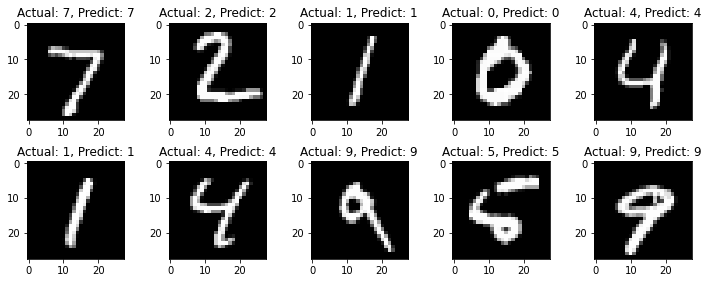

In [22]:
import matplotlib.pyplot as plt

num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col, 2*num_row))
for i in range(10):
    image, label = test_data[i]
    predict = torch.argmax(model(image.reshape(-1, input_size)), dim=1)
    ax = axes[i//num_col, i%num_col]
    ax.imshow(image.reshape(28, 28), cmap='gray')
    ax.set_title(f'Actual: {label}, Predict: {predict.item()}')
plt.tight_layout()
plt.show()